DATASET 04: USER BEHAVIOR

 User ID   Device Model Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  Age Gender  User Behavior Class
       1 Google Pixel 5          Android                       393                         6.4                     1872                        67                 1122   40   Male                    4
       2      OnePlus 9          Android                       268                         4.7                     1331                        42                  944   47 Female                    3
       3   Xiaomi Mi 11          Android                       154                         4.0                      761                        32                  322   42   Male                    2
       4 Google Pixel 5          Android                       239                         4.8                     1676                        56                  871   20   Male                    3


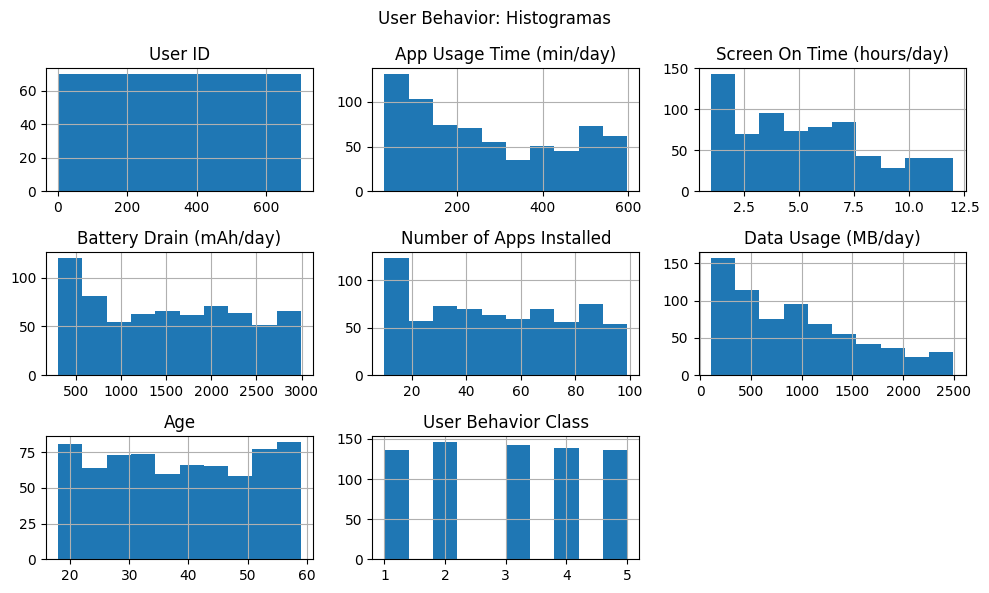

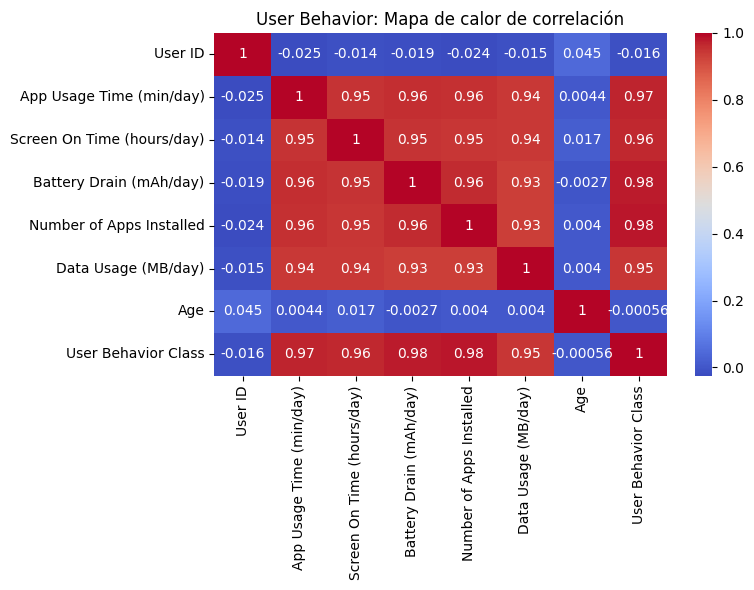


Valores faltantes:
                     index  0
                   User ID  0
              Device Model  0
          Operating System  0
  App Usage Time (min/day)  0
Screen On Time (hours/day)  0
   Battery Drain (mAh/day)  0
  Number of Apps Installed  0
       Data Usage (MB/day)  0
                       Age  0
                    Gender  0
       User Behavior Class  0

Valores atípicos:

User ID: 0 valores atípicos

App Usage Time (min/day): 0 valores atípicos

Screen On Time (hours/day): 0 valores atípicos

Battery Drain (mAh/day): 0 valores atípicos

Number of Apps Installed: 0 valores atípicos

Data Usage (MB/day): 0 valores atípicos

Age: 0 valores atípicos

User Behavior Class: 0 valores atípicos

--- Resumen de hallazgos ---

            * El conjunto de datos contiene información sobre el comportamiento del usuario,
            incluyendo la identificación del usuario, el modelo del dispositivo, el sistema operativo,
            el tiempo de uso de la aplicación (min/dí

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos
df_users = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/core05/user_behavior_dataset.csv")

# Mostrar las primeras 5 filas y todas las columnas
print(df_users.head().to_string(index=False))

# Mostrar columnas y sus tipos
print(df_users.info())

# Realizar EDA e imprimir los hallazgos
def eda(df, name):
    print(f"\n--- {name.upper()} ---")

    # Mostrar las estadísticas descriptivas de las características numéricas
    print("\nEstadísticas descriptivas:")
    print(df.describe().to_string())

    # Analizar la distribución de las características categóricas
    print("\nCaracterísticas categóricas:")
    for col in df.select_dtypes(include=['object']):
        if df[col].nunique() < 50:  # Solo imprimir si hay un número razonable de valores únicos
            print(f"\n{col}:")
            print(df[col].value_counts().reset_index().to_string(index=False))

    # Crear visualizaciones para comprender la distribución de las variables
    df.hist(figsize=(10, 6))
    plt.suptitle(f'{name}: Histogramas')
    plt.tight_layout()
    plt.show()

    # Visualizar las correlaciones entre variables
    plt.figure(figsize=(8, 6))

    # Seleccionar solo columnas numéricas para la correlación
    numeric_df = df.select_dtypes(include=np.number)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'{name}: Mapa de calor de correlación')
    plt.tight_layout()
    plt.show()

    # Detectar valores faltantes
    print("\nValores faltantes:")
    print(df.isnull().sum().reset_index().to_string(index=False))

    # Detectar valores atípicos (usando el método IQR como ejemplo)
    print("\nValores atípicos:")
    for col in df.select_dtypes(include=np.number):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n{col}: {len(outliers)} valores atípicos")

    # --- Resumen de hallazgos del EDA ---
    print("\n--- Resumen de hallazgos ---")
    if name == "User Behavior":
        print(
            """
            * El conjunto de datos contiene información sobre el comportamiento del usuario,
            incluyendo la identificación del usuario, el modelo del dispositivo, el sistema operativo,
            el tiempo de uso de la aplicación (min/día), el tiempo de pantalla encendida (horas/día),
            el consumo de batería (mAh/día), el número de aplicaciones instaladas,
            el uso de datos (MB/día), la edad, el sexo y la clase de comportamiento del usuario.
            * Hay un total de 700 filas y 11 columnas en el conjunto de datos.
            * No hay valores nulos en el conjunto de datos.
            * No se identificaron outliers en el conjunto de datos.
            * Las visualizaciones (histogramas y mapa de calor de correlación) ayudan a
            comprender la distribución de las variables y las relaciones entre ellas.
            """
        )

# Realizar EDA para el conjunto de datos
eda(df_users, "User Behavior")